In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

In [16]:
housing_dataset = pd.read_csv(r"C:\Users\md199\KrishNaikML\House_prediction_using_machine_learning\BostonHousing.csv" )
housing_dataset.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [17]:
housing_dataset.shape

(506, 14)

In [18]:
plt.figure(figsize=(20,10))
corr=housing_dataset
corr

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


<Figure size 2000x1000 with 0 Axes>

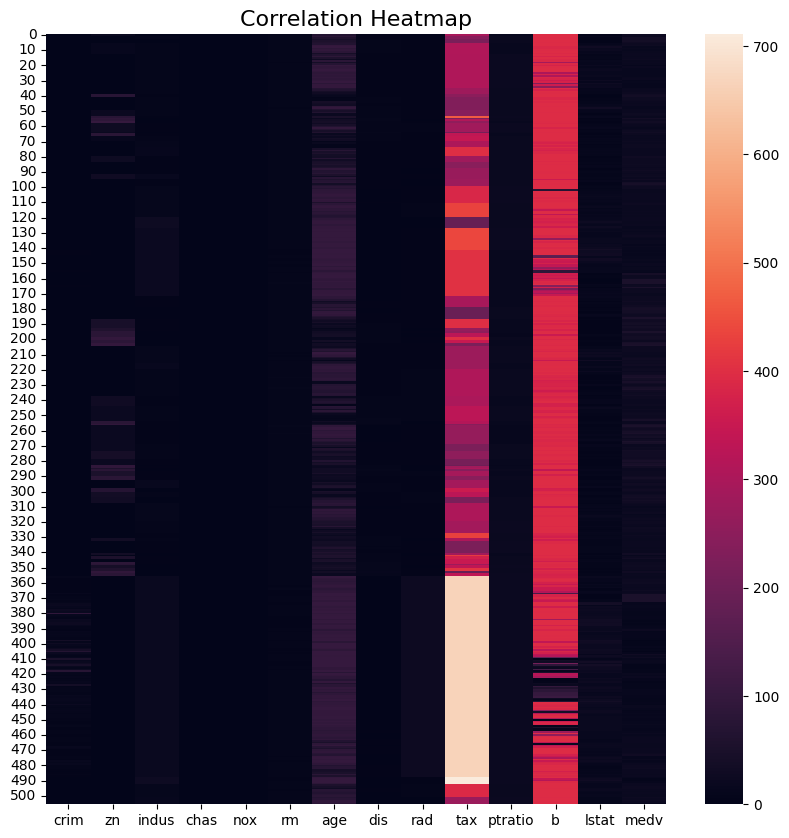

In [19]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [20]:
# Divide data into features and labels
X = housing_dataset.drop(['medv'],axis=1)
y = housing_dataset.filter(['medv'],axis=1)

In [21]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [22]:
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [23]:
# Divide data into training and testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
# Training Linear Regression 
house_predictor=LinearRegression()


In [25]:
house_predictor.fit(X_train,y_train)
y_pred=house_predictor.predict(X_test)

In [26]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 3.1890919658878416
Mean Squared Error: 24.291119474973538
Root Mean Squared Error: 4.928602182665339


In [27]:
comparsion_df=pd.DataFrame({'Actual':y_test.values.tolist(), 'Predicted': y_pred.tolist()})
comparsion_df

,Actual,Predicted
0,[23.6],[28.9967236198249]
1,[32.4],[36.02556533567228]
2,[13.6],[14.816944045388304]
3,[22.8],[25.031979150399476]
4,[16.1],[18.769879915248143]
...,...,...
97,[17.9],[-0.16423699568664318]
98,[9.6],[13.684866815285854]
99,[17.2],[16.18359697171337]
100,[22.5],[22.276219993533378]


In [28]:
print(house_predictor.coef_)

[[-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
  -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
   2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
  -5.08571424e-01]]


In [29]:
# Making predictiob on a single Data Point
X_test.values[1].shape

(13,)

In [31]:
single_point=X_test.values[1].reshape(1,-1)
single_point.shape

(1, 13)

In [32]:
house_predictor.predict(X_test.values[1].reshape(1,-1))

c:\Users\md199\KrishNaikML\House_prediction_using_machine_learning\house\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[36.02556534]])

In [33]:
y_test.values[1]

array([32.4])